In [109]:
from joblib import load
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score,f1_score, roc_curve
from utils.drawing import *

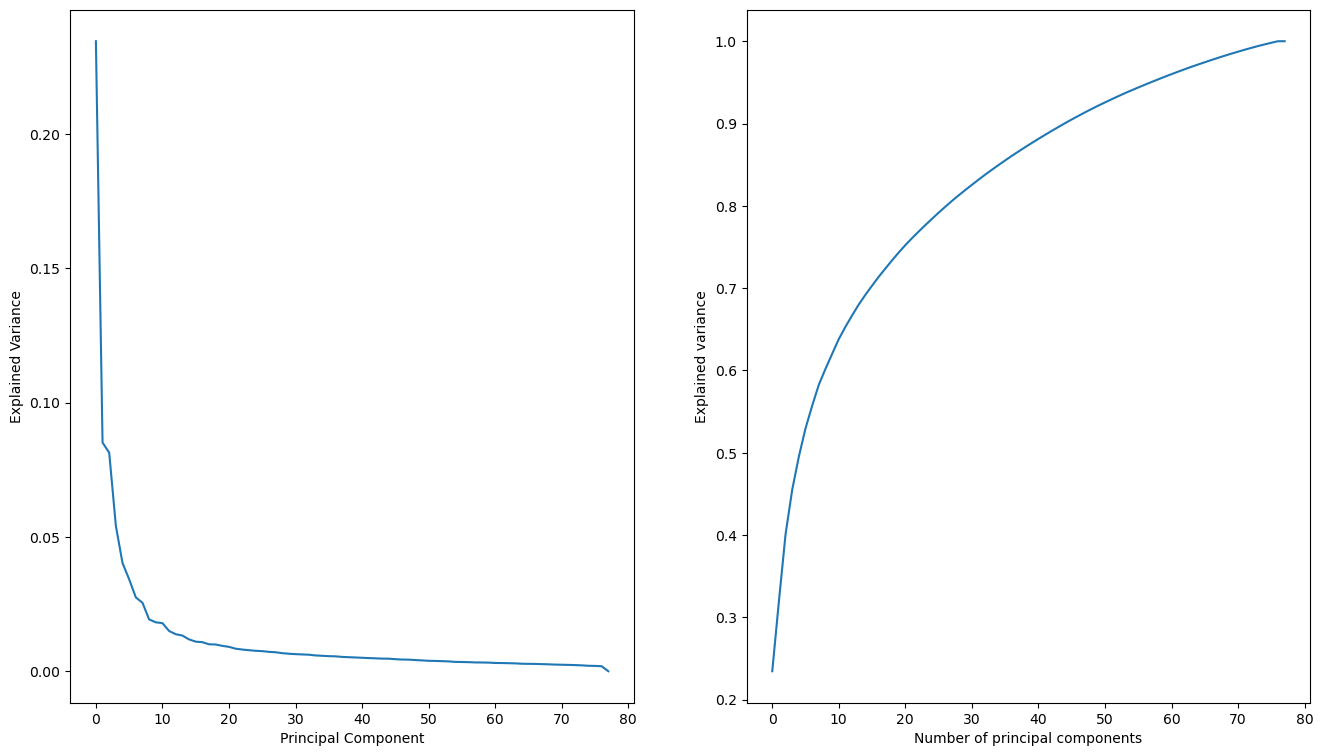

In [110]:
X_train, X_test, y_train, y_test, pca_names, df = load_preprocess_data('../../2023_Data_Mining_Brain_cancer_Dataset/dataset/Brain_GSE50161.csv',
                                                        ['samples','type'], 'type')

In [111]:
knn_no_smote = load('knn_no_smote.pkl')
knn_smote = load('knn_smote.pkl')
rf_no_smote = load('rf_no_smote.pkl')
rf_smote = load('rf_smote.pkl')
svm_no_smote = load('svm_no_smote.pkl')
svm_smote = load('svm_smote.pkl')

In [112]:
y_knn_no_smote = knn_no_smote.predict(X_test)
y_knn_smote = knn_smote.predict(X_test)
y_rf_no_smote = rf_no_smote.predict(X_test)
y_rf_smote = rf_smote.predict(X_test)
y_svm_no_smote = svm_no_smote.predict(X_test)
y_svm_smote = svm_smote.predict(X_test)



In [113]:
acc_knn_no_smote = accuracy_score(y_knn_no_smote, y_test)
acc_knn_smote = accuracy_score(y_knn_smote, y_test)
acc_rf_no_smote = accuracy_score(y_rf_no_smote, y_test)
acc_rf_smote = accuracy_score(y_rf_smote, y_test)
acc_svm_no_smote = accuracy_score(y_svm_no_smote, y_test)
acc_svm_smote = accuracy_score(y_svm_smote, y_test)
accs = [acc_knn_no_smote,acc_knn_smote, acc_rf_no_smote,acc_rf_smote,acc_svm_no_smote,acc_svm_smote]

In [114]:
model_names = ['KNN', 'KNN SMOTE', 'RF', 'RF SMOTE', 'SVC', 'SVC SMOTE']

Text(0.5, 1.0, 'Accuracy of models')

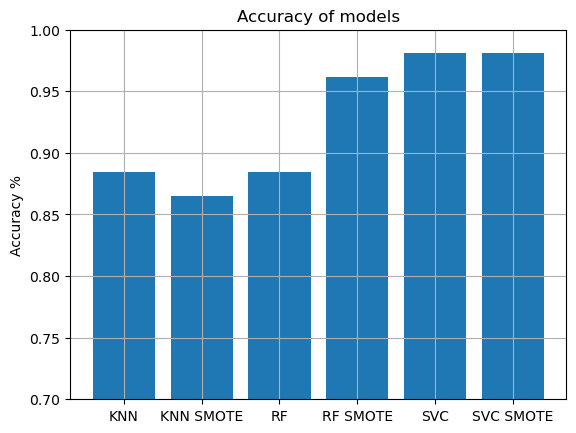

In [115]:
plt.bar(model_names,accs)
plt.ylim(0.7,1)
plt.grid(0.7)
plt.ylabel('Accuracy %')
plt.title('Accuracy of models')

In [116]:
f1_knn_no_smote = f1_score(y_knn_no_smote, y_test, average='weighted')
f1_knn_smote = f1_score(y_knn_smote, y_test, average='weighted')
f1_rf_no_smote = f1_score(y_rf_no_smote, y_test, average='weighted')
f1_rf_smote = f1_score(y_rf_smote, y_test, average='weighted')
f1_svm_no_smote = f1_score(y_svm_no_smote, y_test, average='weighted')
f1_svm_smote = f1_score(y_svm_smote, y_test, average='weighted')
f1s = [f1_knn_no_smote,f1_knn_smote, f1_rf_no_smote,f1_rf_smote,f1_svm_no_smote,f1_svm_smote]

Text(0.5, 1.0, 'F1 score of models')

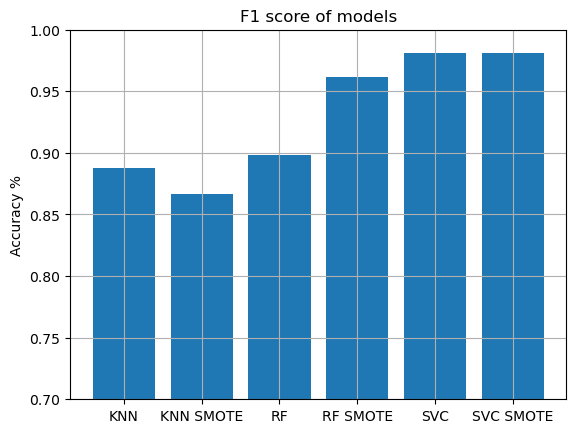

In [117]:
plt.bar(model_names,f1s)
plt.ylim(0.7,1)
plt.grid(0.7)
plt.ylabel('Accuracy %')
plt.title('F1 score of models')

In [118]:
diff_acc = [( (accs[i]-accs[i-1])) for i in range(1,len(accs),2)]
diff_acc


[-0.019230769230769162, 0.07692307692307698, 0.0]

Text(0.5, 1.0, 'Accuracy gain after using SMOTE')

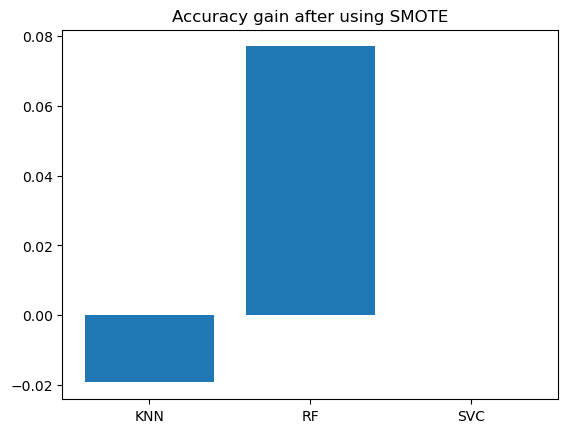

In [119]:
plt.bar(model_names[0::2],diff_acc)
plt.title('Accuracy gain after using SMOTE')

In [120]:
diff_f1 = [( (f1s[i]-f1s[i-1])) for i in range(1,len(f1s),2)]

Text(0.5, 1.0, 'F1 score gain after using SMOTE')

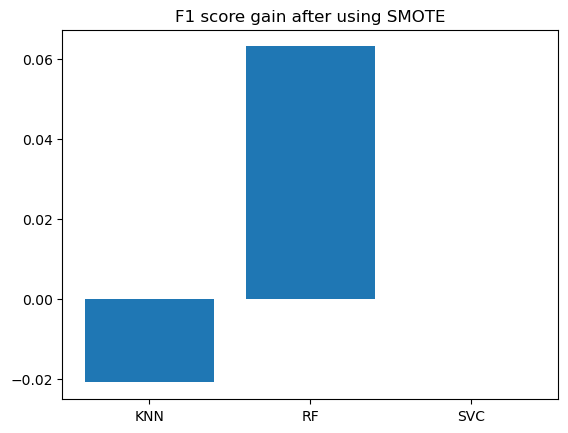

In [121]:
plt.bar(model_names[0::2],diff_f1)
plt.title('F1 score gain after using SMOTE')